In [6]:
import scipy
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

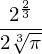

In [7]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume - 1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [8]:
_.evalf()   #将前面的公式数据化，进行估算

In [10]:
def f(r):     
    return 2 * np.pi * r**2 + 2 / r
r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [11]:
f(r_min)

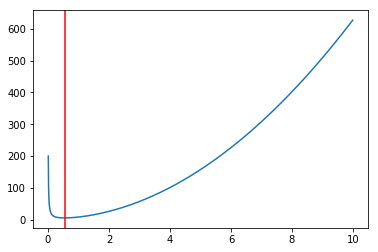

In [15]:
def f(r):
    return 2*np.pi*r**2+2/r
r_min=optimize.brent(f,brack=(0.1,4))
x=np.arange(0.01,10.0,0.01)
y=f(x)
plt.plot(x,y)
plt.axvline(r_min,color='red')    #将解标注出来

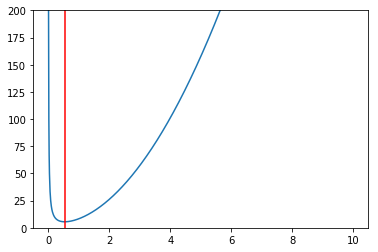

In [16]:
def f(r):
    return 2*np.pi*r**2+2/r
r_min=optimize.brent(f,brack=(0.1,4))
x=np.arange(0.01,10.0,0.01)
y=f(x)
plt.plot(x,y)
plt.axvline(r_min,color='red')    #将解标注出来
plt.ylim(0,200)   #纵坐标范围

In [17]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.5358104459320856
    nfev: 19
     nit: 15
 success: True
       x: 0.54192607725571351

In [18]:
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))

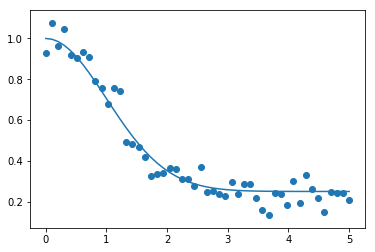

In [19]:
plt.scatter(xdata,ydata)   #将数据以散点的的形式显示出来
plt.plot(xdata,y)

In [23]:
def g(beta):
     return ydata - f(xdata, *beta)

In [24]:
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([ 0.23384926,  0.78883651,  0.48609275])

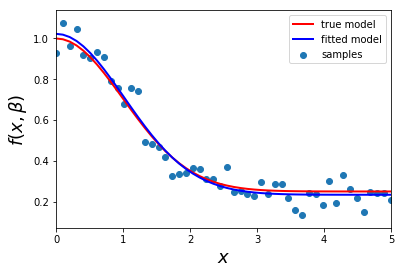

In [25]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()